<div style="border-left: 6px solid #4A90E2; color:white; padding:20px; border-radius:10px; font-family:Arial, sans-serif; text-align:center; font-size:28px; font-weight:bold;">
  📊 01 – Data Exploration and Preprocessing
</div>


<div style="border-left: 6px solid #27ae60; color:white; margin-left:40px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px; font-weight:bold;">
  <h2 style="margin-top: 0; font-size:24px;">📦 Importar Bibliotecas e Definir Caminhos</h2>
</div>

<div style="margin-left:60px; padding:10px;"> 
<p style="font-size:18px;">Este é o bloco inicial do projeto de classificação de imagens de espécies raras.</p>

<p>Aqui realizamos as seguintes ações:</p>

<ul style="line-height: 1.6;">
    <li>📁 <strong>Importação de bibliotecas</strong> para manipulação de dados (<code>pandas</code>), caminhos (<code>pathlib</code>) e imagens (<code>PIL</code>).</li>
    <li>🖼️ <strong>Estilização dos gráficos</strong> com <code>matplotlib</code> e <code>seaborn</code> para visualizações limpas e consistentes.</li>
    <li>📂 <strong>Definição dos caminhos principais</strong> do projeto (imagens e ficheiro de metadata).</li>
    <li>✅ <strong>Verificação automática</strong> para garantir que os ficheiros e diretórios existem.</li>
</ul>


<p>Este setup garante uma base sólida para carregar e explorar os dados com segurança e clareza.</p>
</div>


In [1]:
# ========================================== 📦 Importar bibliotecas essenciais ==========================================
import os
import zipfile
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
from sklearn.model_selection import train_test_split
import numpy as np
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, array_to_img, load_img
from tensorflow.keras.applications.efficientnet import preprocess_input
from tabulate import tabulate
import pprint
import shutil

KeyboardInterrupt: 

In [ ]:
# ========================================== 🎨 Estilo de visualização ==========================================
sns.set(style="whitegrid")

In [ ]:
# ========================================== 📂 Definir caminhos principais do projeto ==========================================
PROJECT_ROOT = Path().resolve().parent

IMAGE_DIR = PROJECT_ROOT / 'data' / 'external'
ITERIM_DIR = PROJECT_ROOT / 'data' / 'iterim'
PROCESSED_DIR = PROJECT_ROOT / 'data' / 'processed'
RAW_DIR = PROJECT_ROOT / 'data' / 'raw'
MODELS_DIR = PROJECT_ROOT / 'models'
REPORTS_DIR = PROJECT_ROOT / 'reports'
OUTPUTS_DIR = PROJECT_ROOT / 'output'
LOGS_DIR = OUTPUTS_DIR / 'logs'
PREDICTIONS_DIR = OUTPUTS_DIR / 'predictions'
METADATA_PATH = IMAGE_DIR / 'metadata.csv'
RARE_SPECIES_PATH = RAW_DIR / 'rare_species.zip'
TRAIN_DIR = PROCESSED_DIR / 'train'
VAL_DIR = PROCESSED_DIR / 'val'
TEST_DIR = PROCESSED_DIR / 'test'

In [ ]:
download = False
pastas = [IMAGE_DIR, ITERIM_DIR, PROCESSED_DIR, RAW_DIR, MODELS_DIR, REPORTS_DIR, OUTPUTS_DIR, LOGS_DIR, PREDICTIONS_DIR, TRAIN_DIR, VAL_DIR, TEST_DIR]
for pasta in pastas:
    pasta.mkdir(parents=True, exist_ok=True)
    print(f"✅ Pasta verificada/criada: {pasta}")

if download:
    with zipfile.ZipFile(RARE_SPECIES_PATH, 'r') as zip_ref:
        zip_ref.extractall(IMAGE_DIR)

✅ Pasta verificada/criada: D:\Repositories\DL_EOLP\data\external
✅ Pasta verificada/criada: D:\Repositories\DL_EOLP\data\iterim
✅ Pasta verificada/criada: D:\Repositories\DL_EOLP\data\processed
✅ Pasta verificada/criada: D:\Repositories\DL_EOLP\data\raw
✅ Pasta verificada/criada: D:\Repositories\DL_EOLP\models
✅ Pasta verificada/criada: D:\Repositories\DL_EOLP\reports
✅ Pasta verificada/criada: D:\Repositories\DL_EOLP\output
✅ Pasta verificada/criada: D:\Repositories\DL_EOLP\output\logs
✅ Pasta verificada/criada: D:\Repositories\DL_EOLP\output\predictions
✅ Pasta verificada/criada: D:\Repositories\DL_EOLP\data\processed\train
✅ Pasta verificada/criada: D:\Repositories\DL_EOLP\data\processed\val
✅ Pasta verificada/criada: D:\Repositories\DL_EOLP\data\processed\test


In [ ]:
print("📁 Caminho base do projeto:", PROJECT_ROOT)
print("🖼️ Diretório das imagens:", IMAGE_DIR, "->", "Existe ✅" if IMAGE_DIR.exists() else "Não encontrado ❌")
print("📄 Caminho do metadata.csv:", METADATA_PATH, "->", "Existe ✅" if METADATA_PATH.exists() else "Não encontrado ❌")
print("📄 Caminho do iterim:", ITERIM_DIR, "->", "Existe ✅" if ITERIM_DIR.exists() else "Não encontrado ❌")
print("📄 Caminho do processed:", PROCESSED_DIR, "->", "Existe ✅" if PROCESSED_DIR.exists() else "Não encontrado ❌")
print("📄 Caminho do raw:", RAW_DIR, "->", "Existe ✅" if RAW_DIR.exists() else "Não encontrado ❌")
print("📄 Caminho do models:", MODELS_DIR, "->", "Existe ✅" if MODELS_DIR.exists() else "Não encontrado ❌")
print("📄 Caminho do reports:", REPORTS_DIR, "->", "Existe ✅" if REPORTS_DIR.exists() else "Não encontrado ❌")
print("📄 Caminho do logs:", LOGS_DIR, "->", "Existe ✅" if LOGS_DIR.exists() else "Não encontrado ❌")
print("📄 Caminho do predictions:", PREDICTIONS_DIR, "->", "Existe ✅" if PREDICTIONS_DIR.exists() else "Não encontrado ❌")
print("📄 Caminho do train:", TRAIN_DIR, "->", "Existe ✅" if TRAIN_DIR.exists() else "Não encontrado ❌")
print("📄 Caminho do validation:", VAL_DIR, "->", "Existe ✅" if VAL_DIR.exists() else "Não encontrado ❌")
print("📄 Caminho do test:", TEST_DIR, "->", "Existe ✅" if TEST_DIR.exists() else "Não encontrado ❌")


📁 Caminho base do projeto: D:\Repositories\DL_EOLP
🖼️ Diretório das imagens: D:\Repositories\DL_EOLP\data\external -> Existe ✅
📄 Caminho do metadata.csv: D:\Repositories\DL_EOLP\data\external\metadata.csv -> Existe ✅
📄 Caminho do iterim: D:\Repositories\DL_EOLP\data\iterim -> Existe ✅
📄 Caminho do processed: D:\Repositories\DL_EOLP\data\processed -> Existe ✅
📄 Caminho do raw: D:\Repositories\DL_EOLP\data\raw -> Existe ✅
📄 Caminho do models: D:\Repositories\DL_EOLP\models -> Existe ✅
📄 Caminho do reports: D:\Repositories\DL_EOLP\reports -> Existe ✅
📄 Caminho do logs: D:\Repositories\DL_EOLP\output\logs -> Existe ✅
📄 Caminho do predictions: D:\Repositories\DL_EOLP\output\predictions -> Existe ✅
📄 Caminho do train: D:\Repositories\DL_EOLP\data\processed\train -> Existe ✅
📄 Caminho do validation: D:\Repositories\DL_EOLP\data\processed\val -> Existe ✅
📄 Caminho do test: D:\Repositories\DL_EOLP\data\processed\test -> Existe ✅


<div style="border-left: 6px solid #27ae60; color:white; margin-left:40px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px; font-weight:bold;">
  <h2 style="margin-top: 0; font-size:24px;">📄 Load CSV – Carregar o metadata</h2>
</div>

<div style="margin-left:60px; padding:10px;"> 
<p>Este bloco lê o ficheiro <code>metadata.csv</code>, que contém os nomes das imagens e as respetivas classificações (como família, filo, reino, etc.).</p>

<p>Os dados são carregados num <code>DataFrame</code> do <strong>pandas</strong>, permitindo análise exploratória, criação de gráficos e preparação para o treino do modelo.</p>

<p>✔️ O ficheiro deve estar localizado em <code>data/raw/metadata.csv</code>, conforme definido no caminho <code>METADATA_PATH</code>.</p>
</div>


In [ ]:
df = pd.read_csv(METADATA_PATH)
print(tabulate(df.head(), headers="keys", tablefmt="fancy_grid", showindex=False, floatfmt=".2f"))

╒══════════════════════════════════════╤══════════════════╤═══════════════╤═══════════╤══════════╤══════════════════╤══════════════════════════════════════════════════════════════════╕
│ rare_species_id                      │   eol_content_id │   eol_page_id │ kingdom   │ phylum   │ family           │ file_path                                                        │
╞══════════════════════════════════════╪══════════════════╪═══════════════╪═══════════╪══════════╪══════════════════╪══════════════════════════════════════════════════════════════════╡
│ 75fd91cb-2881-41cd-88e6-de451e8b60e2 │         12853737 │        449393 │ animalia  │ mollusca │ unionidae        │ mollusca_unionidae/12853737_449393_eol-full-size-copy.jpg        │
├──────────────────────────────────────┼──────────────────┼───────────────┼───────────┼──────────┼──────────────────┼──────────────────────────────────────────────────────────────────┤
│ 28c508bc-63ff-4e60-9c8f-1934367e1528 │         20969394 │        793083 │

<div style="border-left: 6px solid #27ae60; color:white; margin-left:40px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px; font-weight:bold;">
  <h2 style="margin-top: 0; font-size:24px;">📊 Vista Geral do Dataset</h2>
</div>

<div style="margin-left:60px; padding:10px;"> 
  <p>Esta seção apresenta uma visão estatística e visual dos dados disponíveis, focando na sua distribuição por categoria biológica.</p>
</div>


<div style="border-left: 6px solid #ffffff; color:white; margin-left:70px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px; font-weight:bold;">
  <h2 style="margin-top: 0; font-size:24px;">🧮 Verificar quantas imagens existem no total</h2>
</div>

<div style="margin-left:90px; padding:10px;"> 
  <p>É calculado o total de registos (linhas) no dataset, correspondendo ao número de imagens únicas disponíveis.</p>
</div>

In [ ]:
print(f"Total de imagens: {len(df)}")

Total de imagens: 11983


<div style="border-left: 6px solid #ffffff; color:white; margin-left:70px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px; font-weight:bold;">
  <h2 style="margin-top: 0; font-size:24px;">👑 Gráfico de Distribuição por Reino</h2>
</div>

<div style="margin-left:90px; padding:10px;"> 
  <p>Visualização da contagem de imagens agrupadas por <strong>kingdom</strong>, destacando os reinos com mais representações no dataset.</p>
</div>

C:\Users\Tiago Pedro\AppData\Local\Temp\ipykernel_9232\4250488796.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='kingdom', order=df['kingdom'].value_counts().index, palette='viridis')


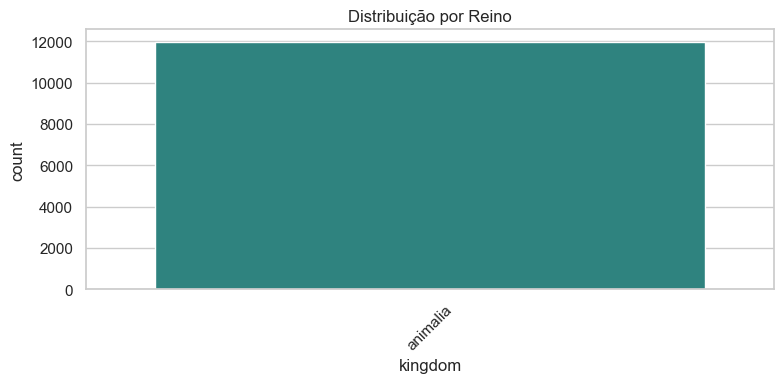

In [ ]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='kingdom', order=df['kingdom'].value_counts().index, palette='viridis')
plt.title('Distribuição por Reino')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div style="border-left: 6px solid #ffffff; color:white; margin-left:70px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px; font-weight:bold;">
  <h2 style="margin-top: 0; font-size:24px;">🌿 Gráfico de Distribuição por Filo</h2>
</div>

<div style="margin-left:90px; padding:10px;"> 
  <p>Mostra os 10 filos mais frequentes no dataset, sendo útil para identificar grupos dominantes.</p>
</div>

C:\Users\Tiago Pedro\AppData\Local\Temp\ipykernel_9232\236568653.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_phyla.index, y=top_phyla.values, palette='plasma')


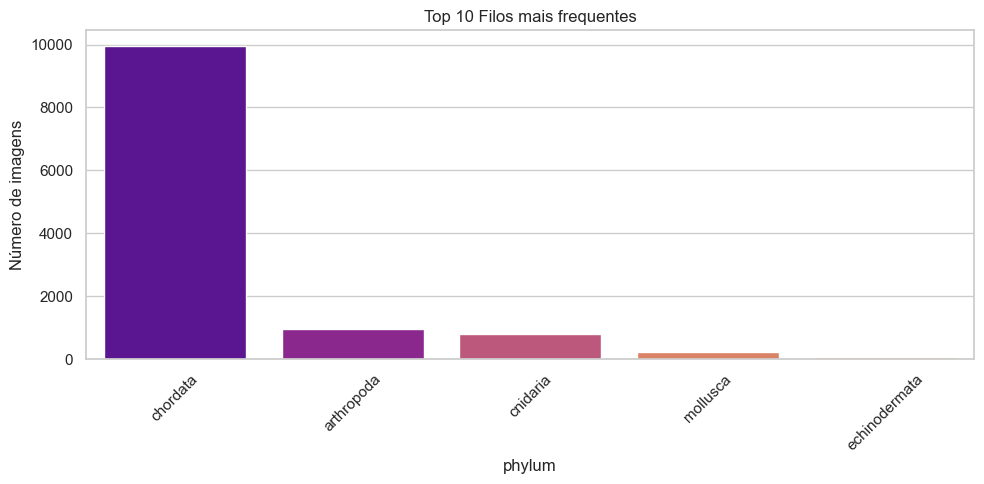

In [ ]:
plt.figure(figsize=(10, 5))
top_phyla = df['phylum'].value_counts().nlargest(10)
sns.barplot(x=top_phyla.index, y=top_phyla.values, palette='plasma')
plt.title('Top 10 Filos mais frequentes')
plt.ylabel('Número de imagens')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div style="border-left: 6px solid #ffffff; color:white; margin-left:70px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px; font-weight:bold;">
  <h2 style="margin-top: 0; font-size:24px;">🧬 Gráfico de Distribuição por Família</h2>
</div>

<div style="margin-left:90px; padding:10px;"> 
  <p>Apresenta as 15 famílias com mais imagens. Isto ajuda a compreender o grau de desbalanceamento entre classes no problema de classificação.</p>
</div>

C:\Users\Tiago Pedro\AppData\Local\Temp\ipykernel_9232\3607442407.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_families.index, y=top_families.values, palette='magma')


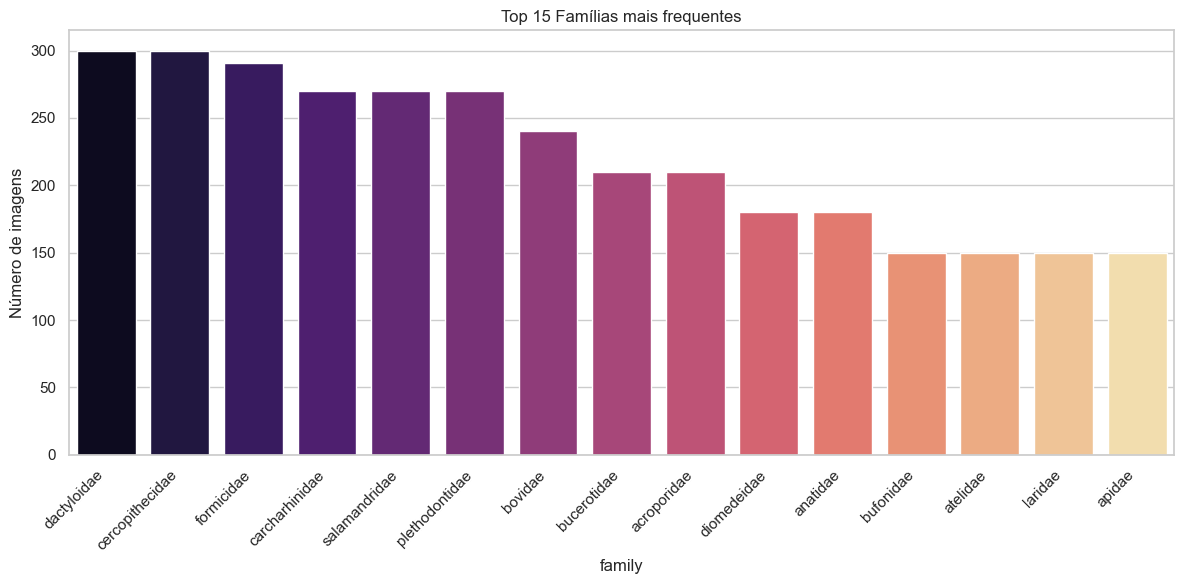

In [ ]:
plt.figure(figsize=(12, 6))
top_families = df['family'].value_counts().nlargest(15)
sns.barplot(x=top_families.index, y=top_families.values, palette='magma')
plt.title('Top 15 Famílias mais frequentes')
plt.ylabel('Número de imagens')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<div style="border-left: 6px solid #27ae60; color:white; margin-left:40px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px; font-weight:bold;">
  <h2 style="margin-top: 0; font-size:24px;">🔍 Verificação do Dataset</h2>
</div>

<div style="margin-left:60px; padding:10px;"> 
  <p>Antes de treinar o modelo, é importante verificar a integridade dos dados. Neste bloco são verificadas:</p>
  <ul>
    <li>🗂️ Presença de imagens em falta (valores ausentes)</li>
    <li>⚖️ Desequilíbrio na quantidade de imagens por classe (família)</li>
    <li>🖼️ Visualização de algumas imagens de exemplo</li>
  </ul>
</div>


<div style="border-left: 6px solid #ffffff; color:white; margin-left:70px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px; font-weight:bold;">
  <h2 style="margin-top: 0; font-size:24px;">📁 Verificação de Imagens em Falta</h2>
</div>

<div style="margin-left:90px; padding:10px;"> 
  <p>Verifica se todos os ficheiros listados no <code>metadata.csv</code> existem nas respetivas subpastas. É feita uma varredura nas pastas dentro de <code>data/external/</code>.</p>
</div>

In [ ]:
def check_image_exists(image_file):
    for root, dirs, files in os.walk(IMAGE_DIR):
        if image_file in files:
            return True
    return False

In [ ]:
missing_images = []
for index, row in df.iterrows():
    image_path = row['file_path']
    image_name = os.path.basename(image_path)
    if not check_image_exists(image_name):
        missing_images.append(image_path)

print(f"Número de imagens em falta: {len(missing_images)}")

Número de imagens em falta: 0


<div style="border-left: 6px solid #ffffff; color:white; margin-left:70px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px; font-weight:bold;">
  <h2 style="margin-top: 0; font-size:24px;">⚠️ Verificação de Desbalanceamento nas Classes</h2>
</div>

<div style="margin-left:90px; padding:10px;"> 
  <p>Mostra a distribuição do número de imagens por família. Também identifica as famílias com menos de 40 imagens — essas classes podem causar problemas durante o treino.</p>
</div>

In [ ]:
family_counts = df['family'].value_counts()

print("\n📊 Número de imagens por família (labels):")
print(family_counts)


📊 Número de imagens por família (labels):
family
dactyloidae        300
cercopithecidae    300
formicidae         291
carcharhinidae     270
salamandridae      270
                  ... 
cyprinodontidae     30
alligatoridae       30
balaenidae          30
goodeidae           30
siluridae           29
Name: count, Length: 202, dtype: int64


<div style="border-left: 6px solid #27ae60; color:white; margin-left:40px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px; font-weight:bold;">
  <h2 style="margin-top: 0; font-size:24px;">🖼️ Ver Exemplos de Imagens</h2>
</div>

<div style="margin-left:60px; padding:10px;"> 
  <p>Seleciona aleatoriamente 5 imagens do dataset e mostra-as com as respetivas famílias. Este passo é útil para confirmar visualmente que os caminhos estão corretos e que as imagens correspondem às labels.</p>
</div>


In [ ]:
sample_df = df.sample(n=5, random_state=10)

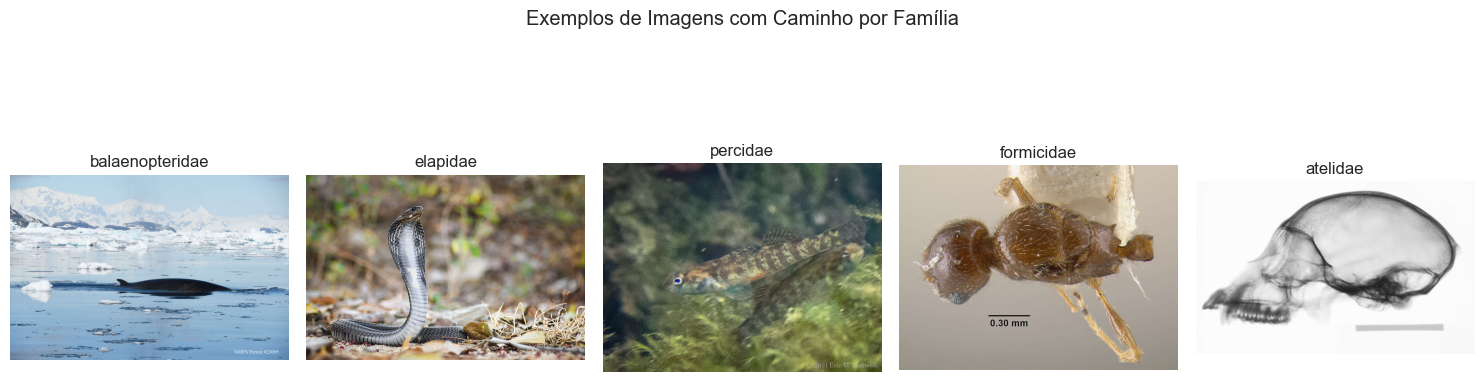

In [ ]:
plt.figure(figsize=(15, 5))
for i, row in enumerate(sample_df.itertuples(), 1):
    img = Image.open(IMAGE_DIR / f'{row.file_path}')
    plt.subplot(1, 5, i)
    plt.imshow(img)
    plt.title(row.family)
    plt.axis('off')

plt.suptitle("Exemplos de Imagens com Caminho por Família")
plt.tight_layout()
plt.show()

<div style="border-left: 6px solid #27ae60; color:white; margin-left:40px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px; font-weight:bold;">
  <h2 style="margin-top: 0; font-size:24px;">⚙️ Pré-processamento</h2>
</div>

<div style="margin-left:60px; padding:10px;"> 
  <p>Esta etapa prepara os dados para serem utilizados no modelo de deep learning. Envolve desde a leitura e organização dos ficheiros até às transformações nas imagens.</p>
</div>


<div style="border-left: 6px solid #ffffff; color:white; margin-left:70px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px; font-weight:bold;">
  <h2 style="margin-top: 0; font-size:24px;">🗂️ Padronizar caminhos das imagens</h2>
</div>

<div style="margin-left:90px; padding:10px;"> 
  <p>Usa a coluna <code>family</code> e o nome do ficheiro da imagem para gerar o caminho completo para cada imagem armazenada nas subpastas de <code>data/external/</code>.</p>
</div>

In [ ]:
df['file_path'] = df['file_path'].apply(lambda x: IMAGE_DIR / x)
print(tabulate(df.head(), headers="keys", tablefmt="fancy_grid", showindex=False, floatfmt=".2f"))

╒══════════════════════════════════════╤══════════════════╤═══════════════╤═══════════╤══════════╤══════════════════╤════════════════════════════════════════════════════════════════════════════════════════════════════════╕
│ rare_species_id                      │   eol_content_id │   eol_page_id │ kingdom   │ phylum   │ family           │ file_path                                                                                              │
╞══════════════════════════════════════╪══════════════════╪═══════════════╪═══════════╪══════════╪══════════════════╪════════════════════════════════════════════════════════════════════════════════════════════════════════╡
│ 75fd91cb-2881-41cd-88e6-de451e8b60e2 │         12853737 │        449393 │ animalia  │ mollusca │ unionidae        │ D:\Repositories\DL_EOLP\data\external\mollusca_unionidae\12853737_449393_eol-full-size-copy.jpg        │
├──────────────────────────────────────┼──────────────────┼───────────────┼───────────┼──────────┼──────────

<div style="border-left: 6px solid #ffffff; color:white; margin-left:70px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px; font-weight:bold;">
  <h2 style="margin-top: 0; font-size:24px;">🧪 Divisão em treino, validação e teste</h2>
</div>

<div style="margin-left:90px; padding:10px;"> 
  <p>O conjunto de dados é dividido para treino e validação. O conjunto de teste é mantido separado e intocado, para avaliar o desempenho final.</p>
</div>

In [ ]:
train_validation_df, test_df = train_test_split(
    df,
    test_size=0.1,
    stratify=df['family'],
    random_state=42
)

print(f"Treino E Validação: {len(train_validation_df)} | Teste: {len(test_df)}")

Treino E Validação: 10784 | Teste: 1199


In [ ]:
test_df.to_csv(ITERIM_DIR / 'test.csv', index=False)

In [ ]:
train_df, val_df = train_test_split(
    train_validation_df,
    test_size=0.2,
    stratify=train_validation_df['family'],
    random_state=42
)

print(f"Treino: {len(train_df)} | Validação: {len(val_df)}")

Treino: 8627 | Validação: 2157


In [ ]:
train_df.to_csv(ITERIM_DIR / 'train.csv', index=False)
val_df.to_csv(ITERIM_DIR / 'validation.csv', index=False)

<div style="border-left: 6px solid #ffffff; color:white; margin-left:70px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px; font-weight:bold;">
  <h2 style="margin-top: 0; font-size:24px;">⚙️ Pré-processamento com ImageDataGenerator</h2>
</div>

<div style="margin-left:90px; padding:10px;"> 
  <p>Para treinar redes neurais convolucionais de forma eficiente, é essencial aplicar transformações que normalizam e aumentam a diversidade do conjunto de treino.</p>

  <p>Utilizamos o <code>ImageDataGenerator</code> da biblioteca <code>keras.preprocessing.image</code> para realizar as seguintes tarefas:</p>

  <ul style="line-height: 1.7;">
    <li><strong>Redimensionamento e normalização</strong> das imagens (valores de píxeis entre 0 e 1);</li>
    <li><strong>Data augmentation</strong> no conjunto de treino com rotações, zooms, inversões horizontais e deslocamentos aleatórios;</li>
    <li>Criação de batches (lotes) de imagens prontos para alimentar diretamente o modelo.</li>
  </ul>

  <p>No conjunto de validação, apenas aplicamos normalização, para que a avaliação reflita dados "reais" sem alterações artificiais.</p>

  <p> Primeiramente irei fazer um teste numa imagem de treino e depois iremos aplicar o que queremos no dataset de treino.</p>
</div>

<div style="border-left: 6px solid #7B61FF; color:white; margin-left:90px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px; font-weight:bold;">
  <p style="font-size:20px; margin-left: 30px"> Redimensionamento : </p>
</div>

C:\Users\Tiago Pedro\AppData\Local\Temp\ipykernel_9232\2932011740.py:19: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Tiago Pedro\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


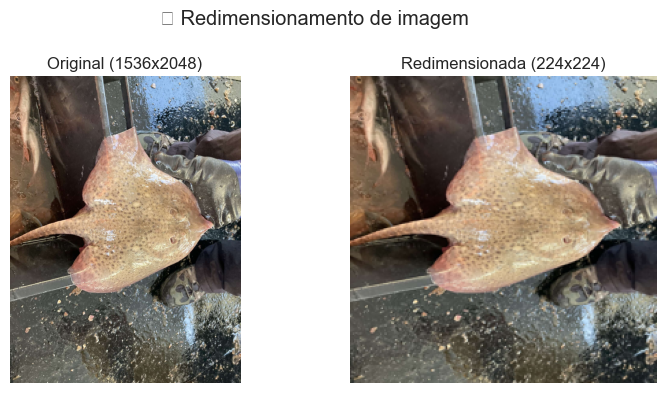

In [ ]:
img_ts_path = train_df['file_path'].iloc[0]
img_ts = Image.open(img_ts_path)

resized_img_ts = img_ts.resize((224, 224))

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(img_ts)
plt.title(f"Original ({img_ts.size[0]}x{img_ts.size[1]})")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resized_img_ts)
plt.title("Redimensionada (224x224)")
plt.axis('off')

plt.suptitle("✅ Redimensionamento de imagem")
plt.tight_layout()
plt.show()


<div style="border-left: 6px solid #7B61FF; color:white; margin-left:90px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px; font-weight:bold;">
  <p style="font-size:20px; margin-left: 30px"> Normalização : </p>
</div>

🔢 Antes da normalização (0-255):
[129 100  86]

⚖️ Após normalização (0-1):
[0.50588235 0.39215686 0.3372549 ]


C:\Users\Tiago Pedro\AppData\Local\Temp\ipykernel_9232\1571123397.py:24: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  plt.tight_layout()


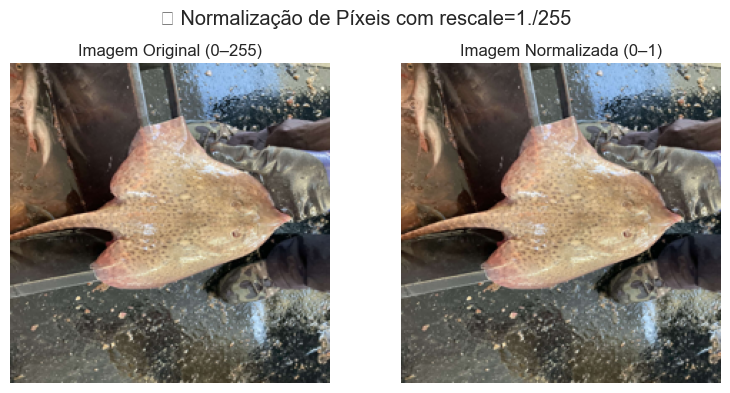

In [ ]:
resized_img_ts_array = np.array(resized_img_ts)

resized_img_ts_normalizada = resized_img_ts_array / 255.0

print("🔢 Antes da normalização (0-255):")
print(resized_img_ts_array[0][0])

print("\n⚖️ Após normalização (0-1):")
print(resized_img_ts_normalizada[0][0])

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(resized_img_ts_array.astype('uint8'))
plt.title("Imagem Original (0–255)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resized_img_ts_normalizada)
plt.title("Imagem Normalizada (0–1)")
plt.axis('off')

plt.suptitle("✅ Normalização de Píxeis com rescale=1./255")
plt.tight_layout()
plt.show()

<div style="border-left: 6px solid #7B61FF; color:white; margin-left:90px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px; font-weight:bold;">
  <p style="font-size:20px; margin-left: 30px"> Escala De Cizentos : </p>
</div>

C:\Users\Tiago Pedro\AppData\Local\Temp\ipykernel_9232\3755089310.py:16: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  plt.tight_layout()


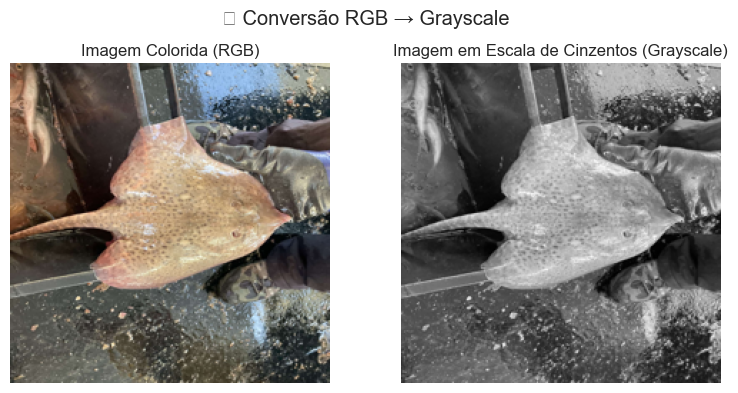

In [ ]:
resized_img_ts_gray = resized_img_ts.convert('L')

plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.imshow(resized_img_ts)
plt.title("Imagem Colorida (RGB)")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resized_img_ts_gray, cmap='gray')
plt.title("Imagem em Escala de Cinzentos (Grayscale)")
plt.axis('off')

plt.suptitle("✅ Conversão RGB → Grayscale")
plt.tight_layout()
plt.show()

<div style="border-left: 6px solid #7B61FF; color:white; margin-left:90px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px; font-weight:bold;">
  <p style="font-size:20px; margin-left: 30px"> Data Augmentation : </p>
</div>

C:\Users\Tiago Pedro\AppData\Local\Temp\ipykernel_9232\390664750.py:24: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) Arial.
  plt.tight_layout()


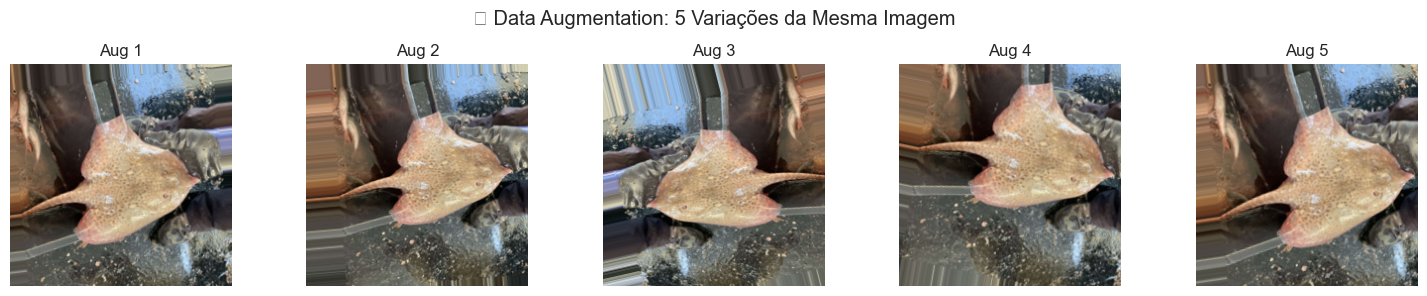

In [ ]:
resized_img_ts_array = img_to_array(resized_img_ts)
resized_img_ts_array = resized_img_ts_array.reshape((1,) + resized_img_ts_array.shape)

augmentador = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=preprocess_input,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

plt.figure(figsize=(15, 3))
for i, batch in enumerate(augmentador.flow(resized_img_ts_array, batch_size=1), 1):
    plt.subplot(1, 5, i)
    plt.imshow(batch[0])
    plt.axis('off')
    plt.title(f"Aug {i}")
    if i == 5:
        break

plt.suptitle("✅ Data Augmentation: 5 Variações da Mesma Imagem")
plt.tight_layout()
plt.show()

<div style="border-left: 6px solid #7B61FF; color:white; margin-left:90px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px; font-weight:bold;">
  <p style="font-size:20px; margin-left: 30px"> Escolha final dos pré-processamento: </p>
</div>

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    preprocessing_function=preprocess_input,
    rotation_range=20,
    zoom_range=0.15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True          
)

val_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
BATCH_SIZE = 32
IMAGE_SIZE = (224, 224)

train_df['file_path'] = train_df['file_path'].astype(str)
val_df['file_path'] = val_df['file_path'].astype(str)


train_generator = train_datagen.flow_from_dataframe(
    train_df,
    x_col='file_path',
    y_col='family',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    val_df,
    x_col='file_path',
    y_col='family',
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 8627 validated image filenames belonging to 202 classes.
Found 2157 validated image filenames belonging to 202 classes.


<div style="border-left: 6px solid #ffffff; color:white; margin-left:70px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px; font-weight:bold;">
  <h2 style="margin-top: 0; font-size:24px;">⚙️ Export The Final Pre-Processed Images</h2>
</div>

<div style="margin-left:90px; padding:10px;"> 
  <p>Exportar as imagens processadas para a pasta das data processada divindindo por train, test and validation</p>
</div>

<div style="border-left: 6px solid #7B61FF; color:white; margin-left:90px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px; font-weight:bold;">
  <p style="font-size:20px; margin-left: 30px"> Treinamento: </p>
</div>

In [ ]:
total_saved = 0
N_VARIACOES = 4

for idx, row in train_df.iterrows():
    img_path = row['file_path']
    classe = row['family']

    img = load_img(img_path, target_size=(224, 224))
    x = img_to_array(img)
    x = x.reshape((1,) + x.shape)

    class_dir = TRAIN_DIR / classe
    class_dir.mkdir(parents=True, exist_ok=True)

    count = 0
    for batch in train_datagen.flow(x, batch_size=1):
        aug_img = array_to_img(batch[0])
        filename = f"{classe}_aug_{idx}_{count}.jpg"
        aug_img.save(class_dir / filename)
        count += 1
        total_saved += 1

        if count >= N_VARIACOES:
            break

print(f"✅ {total_saved} imagens augmentadas ({N_VARIACOES}x por imagem) salvas em {TRAIN_DIR}")

c:\Users\Tiago Pedro\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:3402: DecompressionBombWarning: Image size (115600000 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


✅ 34508 imagens augmentadas (4x por imagem) salvas em D:\Repositories\DL_EOLP\data\processed\train


<div style="border-left: 6px solid #7B61FF; color:white; margin-left:90px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px; font-weight:bold;">
  <p style="font-size:20px; margin-left: 30px"> Validação: </p>
</div>

In [ ]:
val_class_map = {v: k for k, v in val_generator.class_indices.items()}
num_batches_val = len(val_generator)
saved_val_count = 0

for batch_index, (images, labels) in enumerate(val_generator):
    for i in range(len(images)):
        img = array_to_img(images[i])
        label_index = np.argmax(labels[i])
        class_name = val_class_map[label_index]

        class_dir = VAL_DIR / class_name
        class_dir.mkdir(parents=True, exist_ok=True)

        filename = f"{class_name}_{batch_index}_{i}.jpg"
        img.save(class_dir / filename)
        saved_val_count += 1

    if batch_index >= num_batches_val - 1:
        break

val_generator.reset()

print(f"✅ Exportadas {saved_val_count} imagens para {VAL_DIR}")

✅ Exportadas 2157 imagens para D:\Repositories\DL_EOLP\data\processed\val


<div style="border-left: 6px solid #7B61FF; color:white; margin-left:90px; padding:10px; border-radius:10px; font-family:Arial, sans-serif; font-size:24px; font-weight:bold;">
  <p style="font-size:20px; margin-left: 30px"> Teste: </p>
</div>

In [ ]:
copied_count = 0

for _, row in test_df.iterrows():
    origem = row['file_path']
    classe = row['family']

    destino_classe = TEST_DIR / classe
    destino_classe.mkdir(parents=True, exist_ok=True)

    destino = destino_classe / origem.name

    if not destino.exists():
        shutil.copy2(origem, destino)
        copied_count += 1

print(f"✅ {copied_count} imagens de teste copiadas para {TEST_DIR}")

✅ 1199 imagens de teste copiadas para D:\Repositories\DL_EOLP\data\processed\test
